<a href="https://colab.research.google.com/github/Kaiizx/Thai-Handwritten-Characters-Recognition/blob/main/ThaiHandwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Apr  1 22:36:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle
!cp /content/drive/MyDrive/colab/kaggle.json /content/kaggle.json
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c thai-handwritten-characters-recognition

100% 205M/205M [00:08<00:00, 28.7MB/s]
100% 205M/205M [00:08<00:00, 24.9MB/s]


In [ ]:
!mkdir /content/dataset
!unzip /content/thai-handwritten-characters-recognition.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/train/65/Set3_M1_P-0089_201.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0090_203.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0091_200.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0092_172.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0093_179.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0093_198.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0094_170.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0095_174.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0096_170.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0097_170.jpg  
  inflating: /content/dataset/train/train/65/Set3_M1_P-0098_170.jpg  
  inflating: /content/dataset/train/train/65/Set4_F1_P-0001_168.jpg  
  inflating: /content/dataset/train/train/65/Set4_F1_P-0002_169.jpg  
  inflating: /content/dataset/train/tra

In [ ]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import shutil

#augmentation
import albumentations as A

#opencv
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from PIL import Image, ImageOps

#plot
import matplotlib.pyplot as plt
import seaborn as sns


#Augmentation
from tqdm import tqdm

#Model
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout,Input

from tensorflow.keras.optimizers import RMSprop, SGD

# from tensorflow.keras.applications.vgg16 import VGG16 #vgg16
# from tensorflow.keras.applications.inception_v3 import InceptionV3 #InceptionV3
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3

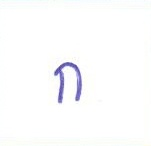

In [ ]:
img=cv2.imread('/content/dataset/train/train/0/Set2_F1_P-0001_23.jpg')

cv2_imshow(img)


In [ ]:
img.shape

(146, 151, 3)

In [ ]:
splitfolders.ratio("/content/dataset/train/train", output="/content/dataset/train_val", seed=1337, ratio=(.90, .10), group_prefix=None, move=False)

Copying files: 63327 files [00:07, 8753.08 files/s]


In [ ]:
datagen = ImageDataGenerator(validation_split=0.1, rescale=1 / 255.)

# Use the dataframe to define train and validation generators

train_generator = datagen.flow_from_directory(
        '/content/dataset/train_val/train',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=32,
        class_mode="sparse")
validation_generator = datagen.flow_from_directory(
        '/content/dataset/train_val/val',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=32,
        class_mode="sparse")

Found 56963 images belonging to 68 classes.
Found 6364 images belonging to 68 classes.


In [ ]:
validation_generator.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '58': 54,
 '59': 55,
 '6': 56,
 '60': 57,
 '61': 58,
 '62': 59,
 '63': 60,
 '64': 61,
 '65': 62,
 '66': 63,
 '67': 64,
 '7': 65,
 '8': 66,
 '9': 67}

In [ ]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [ ]:
# Freeze the base model
base_model.trainable = False

## VGG16_sigmoid


In [ ]:

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.4)(x)

# # Add a fully connected layer with 512 hidden units and ReLU activation
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.4)(x)

# Add a final sigmoid layer with ... node for classification output
x = layers.Dense(68, activation='sigmoid')(x)

model2 = tf.keras.models.Model(base_model.input, x)

#อย่าลืมเปลี่ยน loss ให้เหมาะกับงาน แต่คิดว่าแค่ตัวนี้ก็เพียงพอ
model2.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!rm -rf /content/drive/MyDrive/colab/model/vgg16_thhw

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/colab/model/vgg16_thhw", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='max') #2 ตัวไม่ดีขึ้นก็หยุด
vgghist = model2.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 4.2070 - acc: 0.0375
Epoch 1: val_acc improved from -inf to 0.08171, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 42s 403ms/step - loss: 4.2070 - acc: 0.0375 - val_loss: 4.0219 - val_acc: 0.0817
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 3.9413 - acc: 0.0909
Epoch 2: val_acc improved from 0.08171 to 0.24309, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 39s 392ms/step - loss: 3.9413 - acc: 0.0909 - val_loss: 3.6599 - val_acc: 0.2431
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 3.6552 - acc: 0.1356
Epoch 3: val_acc improved from 0.24309 to 0.28237, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 400ms/step - loss: 3.6552 - acc: 0.1356 - val_loss: 3.2869 - val_acc: 0.2824
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 3.3436 - acc: 0.1994
Epoch 4: val_acc improved from 0.28237 to 0.37209, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 39s 392ms/step - loss: 3.3436 - acc: 0.1994 - val_loss: 2.8867 - val_acc: 0.3721
Epoch 5/1000
100/100 [==============================] - ETA: 0s - loss: 3.0245 - acc: 0.2503
Epoch 5: val_acc improved from 0.37209 to 0.41813, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 57s 573ms/step - loss: 3.0245 - acc: 0.2503 - val_loss: 2.5601 - val_acc: 0.4181
Epoch 6/1000
100/100 [==============================] - ETA: 0s - loss: 2.7772 - acc: 0.2903
Epoch 6: val_acc improved from 0.41813 to 0.49576, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 399ms/step - loss: 2.7772 - acc: 0.2903 - val_loss: 2.2881 - val_acc: 0.4958
Epoch 7/1000
100/100 [==============================] - ETA: 0s - loss: 2.5494 - acc: 0.3344
Epoch 7: val_acc improved from 0.49576 to 0.53551, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 39s 395ms/step - loss: 2.5494 - acc: 0.3344 - val_loss: 2.0305 - val_acc: 0.5355
Epoch 8/1000
100/100 [==============================] - ETA: 0s - loss: 2.3768 - acc: 0.3713
Epoch 8: val_acc improved from 0.53551 to 0.55201, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 402ms/step - loss: 2.3768 - acc: 0.3713 - val_loss: 1.8406 - val_acc: 0.5520
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 2.1871 - acc: 0.4013
Epoch 9: val_acc improved from 0.55201 to 0.60292, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 57s 572ms/step - loss: 2.1871 - acc: 0.4013 - val_loss: 1.6455 - val_acc: 0.6029
Epoch 10/1000
100/100 [==============================] - ETA: 0s - loss: 2.0259 - acc: 0.4378
Epoch 10: val_acc improved from 0.60292 to 0.63765, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 402ms/step - loss: 2.0259 - acc: 0.4378 - val_loss: 1.5136 - val_acc: 0.6376
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 1.8973 - acc: 0.4634
Epoch 11: val_acc improved from 0.63765 to 0.63859, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 399ms/step - loss: 1.8973 - acc: 0.4634 - val_loss: 1.4072 - val_acc: 0.6386
Epoch 12/1000
100/100 [==============================] - ETA: 0s - loss: 1.8312 - acc: 0.4734
Epoch 12: val_acc improved from 0.63859 to 0.68369, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 397ms/step - loss: 1.8312 - acc: 0.4734 - val_loss: 1.3018 - val_acc: 0.6837
Epoch 13/1000
100/100 [==============================] - ETA: 0s - loss: 1.7069 - acc: 0.5044
Epoch 13: val_acc improved from 0.68369 to 0.68542, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 57s 573ms/step - loss: 1.7069 - acc: 0.5044 - val_loss: 1.2238 - val_acc: 0.6854
Epoch 14/1000
100/100 [==============================] - ETA: 0s - loss: 1.6504 - acc: 0.5303
Epoch 14: val_acc improved from 0.68542 to 0.70207, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 397ms/step - loss: 1.6504 - acc: 0.5303 - val_loss: 1.1400 - val_acc: 0.7021
Epoch 15/1000
100/100 [==============================] - ETA: 0s - loss: 1.5298 - acc: 0.5494
Epoch 15: val_acc did not improve from 0.70207
100/100 [==============================] - 37s 367ms/step - loss: 1.5298 - acc: 0.5494 - val_loss: 1.0992 - val_acc: 0.7005
Epoch 16/1000
100/100 [==============================] - ETA: 0s - loss: 1.4651 - acc: 0.5709
Epoch 16: val_acc improved from 0.70207 to 0.73036, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 405ms/step - loss: 1.4651 - acc: 0.5709 - val_loss: 1.0146 - val_acc: 0.7304
Epoch 17/1000
100/100 [==============================] - ETA: 0s - loss: 1.4032 - acc: 0.5866
Epoch 17: val_acc improved from 0.73036 to 0.73900, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 403ms/step - loss: 1.4032 - acc: 0.5866 - val_loss: 0.9900 - val_acc: 0.7390
Epoch 18/1000
100/100 [==============================] - ETA: 0s - loss: 1.3561 - acc: 0.6037
Epoch 18: val_acc improved from 0.73900 to 0.74654, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 39s 395ms/step - loss: 1.3561 - acc: 0.6037 - val_loss: 0.9413 - val_acc: 0.7465
Epoch 19/1000
100/100 [==============================] - ETA: 0s - loss: 1.3538 - acc: 0.5972
Epoch 19: val_acc improved from 0.74654 to 0.75031, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 398ms/step - loss: 1.3538 - acc: 0.5972 - val_loss: 0.9100 - val_acc: 0.7503
Epoch 20/1000
100/100 [==============================] - ETA: 0s - loss: 1.3082 - acc: 0.6122
Epoch 20: val_acc improved from 0.75031 to 0.78048, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw


100/100 [==============================] - 40s 398ms/step - loss: 1.3082 - acc: 0.6122 - val_loss: 0.8228 - val_acc: 0.7805
Epoch 21/1000
100/100 [==============================] - ETA: 0s - loss: 1.2168 - acc: 0.6444
Epoch 21: val_acc did not improve from 0.78048
100/100 [==============================] - 37s 369ms/step - loss: 1.2168 - acc: 0.6444 - val_loss: 0.8258 - val_acc: 0.7703
Epoch 22/1000
100/100 [==============================] - ETA: 0s - loss: 1.2299 - acc: 0.6392
Epoch 22: val_acc did not improve from 0.78048
100/100 [==============================] - 54s 541ms/step - loss: 1.2299 - acc: 0.6392 - val_loss: 0.8174 - val_acc: 0.7761
Epoch 22: early stopping


## VGG16_softmax

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
# x = layers.Dense(512, activation='relu')(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.4)(x)

# # Add a fully connected layer with 512 hidden units and ReLU activation
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.4)(x)

# Add a final sigmoid layer with ... node for classification output
x = layers.Dense(68, activation='softmax')(x)

model3 = tf.keras.models.Model(base_model.input, x)

#อย่าลืมเปลี่ยน loss ให้เหมาะกับงาน แต่คิดว่าแค่ตัวนี้ก็เพียงพอ
model3.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# !rm -rf /content/drive/MyDrive/colab/model/vgg16_thhw

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='max') #2 ตัวไม่ดีขึ้นก็หยุด
vgghist = model3.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
 99/100 [============================>.] - ETA: 0s - loss: 4.2022 - acc: 0.0312
Epoch 1: val_acc improved from -inf to 0.08642, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 16s 151ms/step - loss: 4.2014 - acc: 0.0319 - val_loss: 4.0452 - val_acc: 0.0864
Epoch 2/1000
 99/100 [============================>.] - ETA: 0s - loss: 3.9881 - acc: 0.0638
Epoch 2: val_acc improved from 0.08642 to 0.15195, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 148ms/step - loss: 3.9856 - acc: 0.0634 - val_loss: 3.7637 - val_acc: 0.1519
Epoch 3/1000
 99/100 [============================>.] - ETA: 0s - loss: 3.7525 - acc: 0.1121
Epoch 3: val_acc improved from 0.15195 to 0.23240, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 155ms/step - loss: 3.7514 - acc: 0.1113 - val_loss: 3.4281 - val_acc: 0.2324
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 3.4824 - acc: 0.1641
Epoch 4: val_acc improved from 0.23240 to 0.32244, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 152ms/step - loss: 3.4824 - acc: 0.1641 - val_loss: 3.0893 - val_acc: 0.3224
Epoch 5/1000
 99/100 [============================>.] - ETA: 0s - loss: 3.1703 - acc: 0.2282
Epoch 5: val_acc improved from 0.32244 to 0.36424, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 154ms/step - loss: 3.1705 - acc: 0.2272 - val_loss: 2.7597 - val_acc: 0.3642
Epoch 6/1000
100/100 [==============================] - ETA: 0s - loss: 2.9792 - acc: 0.2597
Epoch 6: val_acc improved from 0.36424 to 0.46983, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 16s 159ms/step - loss: 2.9792 - acc: 0.2597 - val_loss: 2.4788 - val_acc: 0.4698
Epoch 7/1000
 99/100 [============================>.] - ETA: 0s - loss: 2.7568 - acc: 0.3042
Epoch 7: val_acc improved from 0.46983 to 0.49104, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 154ms/step - loss: 2.7553 - acc: 0.3043 - val_loss: 2.2594 - val_acc: 0.4910
Epoch 8/1000
 99/100 [============================>.] - ETA: 0s - loss: 2.5591 - acc: 0.3270
Epoch 8: val_acc improved from 0.49104 to 0.51980, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 16s 157ms/step - loss: 2.5570 - acc: 0.3269 - val_loss: 2.0355 - val_acc: 0.5198
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 2.3652 - acc: 0.3628
Epoch 9: val_acc improved from 0.51980 to 0.52750, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 151ms/step - loss: 2.3652 - acc: 0.3628 - val_loss: 1.8915 - val_acc: 0.5275
Epoch 10/1000
 99/100 [============================>.] - ETA: 0s - loss: 2.2341 - acc: 0.3958
Epoch 10: val_acc improved from 0.52750 to 0.59287, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 153ms/step - loss: 2.2328 - acc: 0.3963 - val_loss: 1.6791 - val_acc: 0.5929
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 2.0684 - acc: 0.4303
Epoch 11: val_acc improved from 0.59287 to 0.61502, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 16s 157ms/step - loss: 2.0684 - acc: 0.4303 - val_loss: 1.5531 - val_acc: 0.6150
Epoch 12/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.9260 - acc: 0.4605
Epoch 12: val_acc improved from 0.61502 to 0.64692, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 152ms/step - loss: 1.9294 - acc: 0.4606 - val_loss: 1.4366 - val_acc: 0.6469
Epoch 13/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.8468 - acc: 0.4890
Epoch 13: val_acc improved from 0.64692 to 0.65085, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 152ms/step - loss: 1.8438 - acc: 0.4903 - val_loss: 1.3460 - val_acc: 0.6508
Epoch 14/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.7868 - acc: 0.4924
Epoch 14: val_acc improved from 0.65085 to 0.68589, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 16s 159ms/step - loss: 1.7903 - acc: 0.4925 - val_loss: 1.2899 - val_acc: 0.6859
Epoch 15/1000
100/100 [==============================] - ETA: 0s - loss: 1.7202 - acc: 0.5125
Epoch 15: val_acc did not improve from 0.68589
100/100 [==============================] - 13s 129ms/step - loss: 1.7202 - acc: 0.5125 - val_loss: 1.2279 - val_acc: 0.6746
Epoch 16/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.6348 - acc: 0.5268
Epoch 16: val_acc improved from 0.68589 to 0.71574, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 151ms/step - loss: 1.6341 - acc: 0.5259 - val_loss: 1.1407 - val_acc: 0.7157
Epoch 17/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.5328 - acc: 0.5549
Epoch 17: val_acc did not improve from 0.71574
100/100 [==============================] - 13s 127ms/step - loss: 1.5315 - acc: 0.5553 - val_loss: 1.0876 - val_acc: 0.7131
Epoch 18/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.4876 - acc: 0.5638
Epoch 18: val_acc improved from 0.71574 to 0.72784, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 152ms/step - loss: 1.4870 - acc: 0.5644 - val_loss: 1.0447 - val_acc: 0.7278
Epoch 19/1000
100/100 [==============================] - ETA: 0s - loss: 1.4389 - acc: 0.5803
Epoch 19: val_acc improved from 0.72784 to 0.74041, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 16s 157ms/step - loss: 1.4389 - acc: 0.5803 - val_loss: 0.9738 - val_acc: 0.7404
Epoch 20/1000
100/100 [==============================] - ETA: 0s - loss: 1.4020 - acc: 0.5916
Epoch 20: val_acc improved from 0.74041 to 0.76116, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 154ms/step - loss: 1.4020 - acc: 0.5916 - val_loss: 0.9422 - val_acc: 0.7612
Epoch 21/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.3150 - acc: 0.6095
Epoch 21: val_acc did not improve from 0.76116
100/100 [==============================] - 12s 125ms/step - loss: 1.3170 - acc: 0.6103 - val_loss: 0.9356 - val_acc: 0.7558
Epoch 22/1000
100/100 [==============================] - ETA: 0s - loss: 1.2757 - acc: 0.6216
Epoch 22: val_acc improved from 0.76116 to 0.77373, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 152ms/step - loss: 1.2757 - acc: 0.6216 - val_loss: 0.8609 - val_acc: 0.7737
Epoch 23/1000
100/100 [==============================] - ETA: 0s - loss: 1.2235 - acc: 0.6391
Epoch 23: val_acc improved from 0.77373 to 0.77923, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 155ms/step - loss: 1.2235 - acc: 0.6391 - val_loss: 0.8341 - val_acc: 0.7792
Epoch 24/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.2035 - acc: 0.6487
Epoch 24: val_acc improved from 0.77923 to 0.78426, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 151ms/step - loss: 1.2039 - acc: 0.6488 - val_loss: 0.8156 - val_acc: 0.7843
Epoch 25/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.1835 - acc: 0.6411
Epoch 25: val_acc did not improve from 0.78426
100/100 [==============================] - 12s 125ms/step - loss: 1.1800 - acc: 0.6419 - val_loss: 0.7822 - val_acc: 0.7835
Epoch 26/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.1123 - acc: 0.6629
Epoch 26: val_acc improved from 0.78426 to 0.78771, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 16s 156ms/step - loss: 1.1185 - acc: 0.6616 - val_loss: 0.7752 - val_acc: 0.7877
Epoch 27/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.1777 - acc: 0.6458
Epoch 27: val_acc improved from 0.78771 to 0.79353, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 149ms/step - loss: 1.1765 - acc: 0.6459 - val_loss: 0.7516 - val_acc: 0.7935
Epoch 28/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.0986 - acc: 0.6761
Epoch 28: val_acc improved from 0.79353 to 0.79745, saving model to /content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase


100/100 [==============================] - 15s 154ms/step - loss: 1.0992 - acc: 0.6759 - val_loss: 0.7428 - val_acc: 0.7975
Epoch 29/1000
 99/100 [============================>.] - ETA: 0s - loss: 1.1081 - acc: 0.6679
Epoch 29: val_acc did not improve from 0.79745
100/100 [==============================] - 12s 124ms/step - loss: 1.1094 - acc: 0.6678 - val_loss: 0.7170 - val_acc: 0.7927
Epoch 30/1000
100/100 [==============================] - ETA: 0s - loss: 1.0644 - acc: 0.6794
Epoch 30: val_acc did not improve from 0.79745
100/100 [==============================] - 12s 125ms/step - loss: 1.0644 - acc: 0.6794 - val_loss: 0.7103 - val_acc: 0.7967
Epoch 30: early stopping


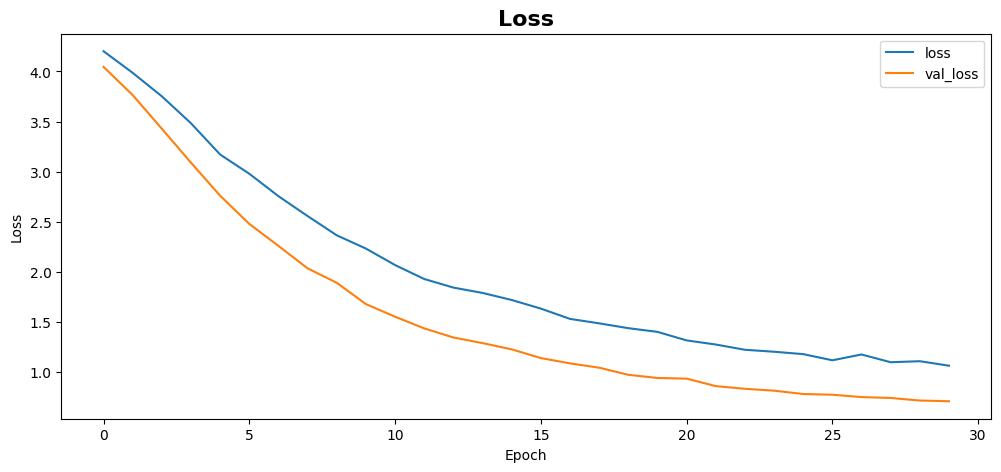

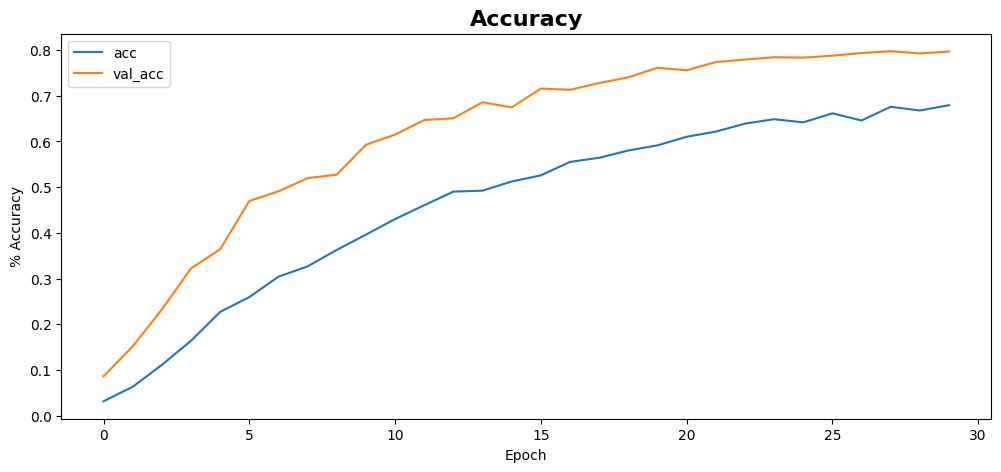

In [ ]:
history_df = pd.DataFrame(vgghist.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")
history_df[['acc', 'val_acc']].plot(figsize=(12,5))
plt.title("Accuracy", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("% Accuracy");

In [ ]:
sub = pd.read_csv('/content/dataset/submission.csv')
sub

,filename,class
0,0.jpg,28.0
1,1.jpg,8.0
2,2.jpg,9.0
3,3.jpg,NaN
4,4.jpg,NaN
...,...,...
13594,13594.jpg,NaN
13595,13595.jpg,NaN
13596,13596.jpg,NaN
13597,13597.jpg,NaN


In [ ]:
predict_sub=sub.copy()
predict_sub

,filename,class
0,0.jpg,28.0
1,1.jpg,8.0
2,2.jpg,9.0
3,3.jpg,NaN
4,4.jpg,NaN
...,...,...
13594,13594.jpg,NaN
13595,13595.jpg,NaN
13596,13596.jpg,NaN
13597,13597.jpg,NaN


In [ ]:
predict_sub['filename']= '/content/dataset/test/test/' + predict_sub['filename'].astype(str)
predict_sub

,filename,class
0,/content/dataset/test/test/0.jpg,28.0
1,/content/dataset/test/test/1.jpg,8.0
2,/content/dataset/test/test/2.jpg,9.0
3,/content/dataset/test/test/3.jpg,NaN
4,/content/dataset/test/test/4.jpg,NaN
...,...,...
13594,/content/dataset/test/test/13594.jpg,NaN
13595,/content/dataset/test/test/13595.jpg,NaN
13596,/content/dataset/test/test/13596.jpg,NaN
13597,/content/dataset/test/test/13597.jpg,NaN


In [ ]:
test_datagen = ImageDataGenerator(rescale=1 / 255.)
test_generator = test_datagen.flow_from_dataframe(predict_sub, x_col='filename', batch_size = 32, class_mode = None , target_size = (224, 224), shuffle=False)

Found 13599 validated image filenames.


In [ ]:
model_best = keras.models.load_model('/content/drive/MyDrive/colab/model/vgg16_thhw_softmax')

#predict
pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)
pred



425/425 [==============================] - 18s 42ms/step


array([21, 66, 67, ..., 11,  1, 25])

In [ ]:
pred[:5]

array([21, 66, 67, 19, 29])

In [ ]:
predict_sub['values']=pred
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28,21
1,/content/dataset/test/test/1.jpg,8,66
2,/content/dataset/test/test/2.jpg,9,67
3,/content/dataset/test/test/3.jpg,26,19
4,/content/dataset/test/test/4.jpg,35,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,6,56
13595,/content/dataset/test/test/13595.jpg,2,12
13596,/content/dataset/test/test/13596.jpg,19,11
13597,/content/dataset/test/test/13597.jpg,1,1


In [ ]:
#switch values and keys
clas = dict(validation_generator.class_indices)
clas = {v: k for k, v in clas.items()}
clas

In [ ]:
predict_sub['class']=predict_sub['values'].map(clas)
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28,21
1,/content/dataset/test/test/1.jpg,8,66
2,/content/dataset/test/test/2.jpg,9,67
3,/content/dataset/test/test/3.jpg,26,19
4,/content/dataset/test/test/4.jpg,35,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,6,56
13595,/content/dataset/test/test/13595.jpg,2,12
13596,/content/dataset/test/test/13596.jpg,19,11
13597,/content/dataset/test/test/13597.jpg,1,1


In [ ]:
sub['class']=predict_sub['class']
sub

,filename,class
0,0.jpg,28
1,1.jpg,8
2,2.jpg,9
3,3.jpg,26
4,4.jpg,35
...,...,...
13594,13594.jpg,6
13595,13595.jpg,2
13596,13596.jpg,19
13597,13597.jpg,1


In [ ]:
sub.to_csv('/content/drive/MyDrive/colab/model/ThHw/VGG16_softmax.csv', index=False)

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw/VGG16_softmax.csv -m "VGG16_softmax"

100% 160k/160k [00:03<00:00, 47.6kB/s]
Successfully submitted to Hackathon Online: Image Processing

## Finetune

In [ ]:
model_best = keras.models.load_model('/content/drive/MyDrive/colab/model/vgg16_thhw_softmax_phrase')

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
# x = layers.Dense(512, activation='relu')(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.4)(x)

# # Add a fully connected layer with 512 hidden units and ReLU activation
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.4)(x)

# Add a final sigmoid layer with ... node for classification output
x = layers.Dense(68, activation='softmax')(x)

model4 = tf.keras.models.Model(base_model.input, x)

#อย่าลืมเปลี่ยน loss ให้เหมาะกับงาน แต่คิดว่าแค่ตัวนี้ก็เพียงพอ
model4.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Unfreeze the base model
base_model.trainable = True

#Everytime you Unfreeze call compile please
model4.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
vgghist = model4.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 4.2203 - acc: 0.0172
Epoch 1: val_acc did not improve from 0.79745
100/100 [==============================] - 18s 140ms/step - loss: 4.2203 - acc: 0.0172 - val_loss: 4.2193 - val_acc: 0.0157
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 4.2196 - acc: 0.0172
Epoch 2: val_acc did not improve from 0.79745
100/100 [==============================] - 14s 137ms/step - loss: 4.2196 - acc: 0.0172 - val_loss: 4.2192 - val_acc: 0.0157
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 4.2196 - acc: 0.0116
Epoch 3: val_acc did not improve from 0.79745
100/100 [==============================] - 14s 138ms/step - loss: 4.2196 - acc: 0.0116 - val_loss: 4.2191 - val_acc: 0.0156
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 4.2197 - acc: 0.0162
Epoch 4: val_acc did not improve from 0.79745
100/100 [==============================] - 14s 139ms/step - loss: 4.2197

In [ ]:
for i, layer in enumerate(model4.layers):
    print(i, layer.name, layer.trainable)

0 input_1 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_2 True
20 dense_6 True
21 dropout_2 True
22 dense_7 True
23 dense_8 True


In [ ]:
model_best = keras.models.load_model('/content/drive/MyDrive/colab/model/vgg16_thhw_softmax_256')

#predict
pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)
pred

425/425 [==============================] - 18s 42ms/step


array([21, 66, 67, ..., 11,  1, 25])

In [ ]:
predict_sub['values']=pred
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28.0,21
1,/content/dataset/test/test/1.jpg,8.0,66
2,/content/dataset/test/test/2.jpg,9.0,67
3,/content/dataset/test/test/3.jpg,NaN,19
4,/content/dataset/test/test/4.jpg,NaN,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,NaN,56
13595,/content/dataset/test/test/13595.jpg,NaN,12
13596,/content/dataset/test/test/13596.jpg,NaN,11
13597,/content/dataset/test/test/13597.jpg,NaN,1


In [ ]:
predict_sub['class']=predict_sub['values'].map(clas)
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28,21
1,/content/dataset/test/test/1.jpg,8,66
2,/content/dataset/test/test/2.jpg,9,67
3,/content/dataset/test/test/3.jpg,26,19
4,/content/dataset/test/test/4.jpg,35,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,6,56
13595,/content/dataset/test/test/13595.jpg,2,12
13596,/content/dataset/test/test/13596.jpg,19,11
13597,/content/dataset/test/test/13597.jpg,1,1


In [ ]:
sub['class']=predict_sub['class']
sub

,filename,class
0,0.jpg,28
1,1.jpg,8
2,2.jpg,9
3,3.jpg,26
4,4.jpg,35
...,...,...
13594,13594.jpg,6
13595,13595.jpg,2
13596,13596.jpg,19
13597,13597.jpg,1


In [ ]:
sub.to_csv('/content/drive/MyDrive/colab/model/ThHw/VGG16_softmax_256.csv', index=False)

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw/VGG16_softmax_256.csv -m "VGG16_softmax_256"

100% 160k/160k [00:00<00:00, 758kB/s]
Successfully submitted to Hackathon Online: Image Processing

## InceptionV3

In [ ]:
datagen = ImageDataGenerator(validation_split=0.1, rescale=1 / 255.)

# Use the dataframe to define train and validation generators

train_generator = datagen.flow_from_directory(
        '/content/dataset/train_val/train',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=32,
        class_mode="sparse")
validation_generator = datagen.flow_from_directory(
        '/content/dataset/train_val/val',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=32,
        class_mode="sparse")

In [ ]:
train_dir= '/content/dataset/train_val/train'
validation_dir='/content/dataset/train_val/val'

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
# train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Train Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 100, class_mode = 'sparse', target_size = (75, 75))

# Validation Flow validation images in batches of 100 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 100, class_mode = 'sparse', target_size = (75, 75))

# Test use flow from dataframe เพราะ เวลาส่งชื่อต้องเรียงตาม format เขา
test_generator = test_datagen.flow_from_dataframe(predict_sub, x_col='filename', batch_size = 100, class_mode = None, target_size = (75, 75), shuffle=False)
     

Found 56963 images belonging to 68 classes.
Found 6364 images belonging to 68 classes.
Found 13599 validated image filenames.


In [ ]:
base_model = InceptionV3(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')

for layer in tqdm(base_model.layers):
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128, activation='relu')(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(68, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
     

87910968/87910968 [==============================] - 0s 0us/step


100%|██████████| 311/311 [00:00<00:00, 45057.98it/s]


In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/colab/model/IncepV3_Best", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
Incephist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 4.0583 - acc: 0.0547
Epoch 1: val_acc improved from -inf to 0.15446, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 50s 439ms/step - loss: 4.0583 - acc: 0.0547 - val_loss: 3.6322 - val_acc: 0.1545
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 3.4465 - acc: 0.1657
Epoch 2: val_acc improved from 0.15446 to 0.27766, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 423ms/step - loss: 3.4465 - acc: 0.1657 - val_loss: 2.9247 - val_acc: 0.2777
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 2.9564 - acc: 0.2535
Epoch 3: val_acc improved from 0.27766 to 0.34931, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 421ms/step - loss: 2.9564 - acc: 0.2535 - val_loss: 2.5233 - val_acc: 0.3493
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 2.6472 - acc: 0.3076
Epoch 4: val_acc improved from 0.34931 to 0.40069, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 421ms/step - loss: 2.6472 - acc: 0.3076 - val_loss: 2.2628 - val_acc: 0.4007
Epoch 5/1000
100/100 [==============================] - ETA: 0s - loss: 2.4663 - acc: 0.3470
Epoch 5: val_acc improved from 0.40069 to 0.44123, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 416ms/step - loss: 2.4663 - acc: 0.3470 - val_loss: 2.1045 - val_acc: 0.4412
Epoch 6/1000
100/100 [==============================] - ETA: 0s - loss: 2.2968 - acc: 0.3802
Epoch 6: val_acc improved from 0.44123 to 0.46889, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 417ms/step - loss: 2.2968 - acc: 0.3802 - val_loss: 1.9665 - val_acc: 0.4689
Epoch 7/1000
100/100 [==============================] - ETA: 0s - loss: 2.1741 - acc: 0.4078
Epoch 7: val_acc improved from 0.46889 to 0.47659, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 423ms/step - loss: 2.1741 - acc: 0.4078 - val_loss: 1.8913 - val_acc: 0.4766
Epoch 8/1000
100/100 [==============================] - ETA: 0s - loss: 2.0821 - acc: 0.4219
Epoch 8: val_acc improved from 0.47659 to 0.49859, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 422ms/step - loss: 2.0821 - acc: 0.4219 - val_loss: 1.8069 - val_acc: 0.4986
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 2.0002 - acc: 0.4400
Epoch 9: val_acc improved from 0.49859 to 0.51713, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 421ms/step - loss: 2.0002 - acc: 0.4400 - val_loss: 1.7457 - val_acc: 0.5171
Epoch 10/1000
100/100 [==============================] - ETA: 0s - loss: 1.9165 - acc: 0.4598
Epoch 10: val_acc improved from 0.51713 to 0.52561, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 421ms/step - loss: 1.9165 - acc: 0.4598 - val_loss: 1.6864 - val_acc: 0.5256
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 1.8519 - acc: 0.4703
Epoch 11: val_acc improved from 0.52561 to 0.53363, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 421ms/step - loss: 1.8519 - acc: 0.4703 - val_loss: 1.6544 - val_acc: 0.5336
Epoch 12/1000
100/100 [==============================] - ETA: 0s - loss: 1.7941 - acc: 0.4903
Epoch 12: val_acc improved from 0.53363 to 0.53740, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 423ms/step - loss: 1.7941 - acc: 0.4903 - val_loss: 1.6262 - val_acc: 0.5374
Epoch 13/1000
100/100 [==============================] - ETA: 0s - loss: 1.7713 - acc: 0.5011
Epoch 13: val_acc improved from 0.53740 to 0.54934, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 422ms/step - loss: 1.7713 - acc: 0.5011 - val_loss: 1.5836 - val_acc: 0.5493
Epoch 14/1000
100/100 [==============================] - ETA: 0s - loss: 1.7348 - acc: 0.5029
Epoch 14: val_acc improved from 0.54934 to 0.55798, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 425ms/step - loss: 1.7348 - acc: 0.5029 - val_loss: 1.5404 - val_acc: 0.5580
Epoch 15/1000
100/100 [==============================] - ETA: 0s - loss: 1.6869 - acc: 0.5113
Epoch 15: val_acc improved from 0.55798 to 0.56867, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 422ms/step - loss: 1.6869 - acc: 0.5113 - val_loss: 1.5131 - val_acc: 0.5687
Epoch 16/1000
100/100 [==============================] - ETA: 0s - loss: 1.6865 - acc: 0.5194
Epoch 16: val_acc improved from 0.56867 to 0.57150, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 422ms/step - loss: 1.6865 - acc: 0.5194 - val_loss: 1.4963 - val_acc: 0.5715
Epoch 17/1000
100/100 [==============================] - ETA: 0s - loss: 1.6104 - acc: 0.5317
Epoch 17: val_acc improved from 0.57150 to 0.57275, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 421ms/step - loss: 1.6104 - acc: 0.5317 - val_loss: 1.4861 - val_acc: 0.5728
Epoch 18/1000
100/100 [==============================] - ETA: 0s - loss: 1.5739 - acc: 0.5435
Epoch 18: val_acc improved from 0.57275 to 0.58344, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 417ms/step - loss: 1.5739 - acc: 0.5435 - val_loss: 1.4444 - val_acc: 0.5834
Epoch 19/1000
100/100 [==============================] - ETA: 0s - loss: 1.5590 - acc: 0.5505
Epoch 19: val_acc did not improve from 0.58344
100/100 [==============================] - 12s 118ms/step - loss: 1.5590 - acc: 0.5505 - val_loss: 1.4386 - val_acc: 0.5790
Epoch 20/1000
100/100 [==============================] - ETA: 0s - loss: 1.5268 - acc: 0.5572
Epoch 20: val_acc improved from 0.58344 to 0.58532, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 416ms/step - loss: 1.5268 - acc: 0.5572 - val_loss: 1.4222 - val_acc: 0.5853
Epoch 21/1000
100/100 [==============================] - ETA: 0s - loss: 1.5054 - acc: 0.5560
Epoch 21: val_acc improved from 0.58532 to 0.59051, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 418ms/step - loss: 1.5054 - acc: 0.5560 - val_loss: 1.4169 - val_acc: 0.5905
Epoch 22/1000
100/100 [==============================] - ETA: 0s - loss: 1.4671 - acc: 0.5673
Epoch 22: val_acc improved from 0.59051 to 0.59679, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 419ms/step - loss: 1.4671 - acc: 0.5673 - val_loss: 1.3797 - val_acc: 0.5968
Epoch 23/1000
100/100 [==============================] - ETA: 0s - loss: 1.4548 - acc: 0.5750
Epoch 23: val_acc did not improve from 0.59679
100/100 [==============================] - 12s 116ms/step - loss: 1.4548 - acc: 0.5750 - val_loss: 1.3686 - val_acc: 0.5951
Epoch 24/1000
100/100 [==============================] - ETA: 0s - loss: 1.4470 - acc: 0.5723
Epoch 24: val_acc improved from 0.59679 to 0.60497, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 423ms/step - loss: 1.4470 - acc: 0.5723 - val_loss: 1.3519 - val_acc: 0.6050
Epoch 25/1000
100/100 [==============================] - ETA: 0s - loss: 1.4323 - acc: 0.5757
Epoch 25: val_acc did not improve from 0.60497
100/100 [==============================] - 12s 118ms/step - loss: 1.4323 - acc: 0.5757 - val_loss: 1.3487 - val_acc: 0.6028
Epoch 26/1000
100/100 [==============================] - ETA: 0s - loss: 1.3840 - acc: 0.5869
Epoch 26: val_acc improved from 0.60497 to 0.60779, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 420ms/step - loss: 1.3840 - acc: 0.5869 - val_loss: 1.3350 - val_acc: 0.6078
Epoch 27/1000
100/100 [==============================] - ETA: 0s - loss: 1.3730 - acc: 0.5906
Epoch 27: val_acc improved from 0.60779 to 0.61235, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 420ms/step - loss: 1.3730 - acc: 0.5906 - val_loss: 1.3219 - val_acc: 0.6124
Epoch 28/1000
100/100 [==============================] - ETA: 0s - loss: 1.3645 - acc: 0.5929
Epoch 28: val_acc improved from 0.61235 to 0.61439, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 421ms/step - loss: 1.3645 - acc: 0.5929 - val_loss: 1.3136 - val_acc: 0.6144
Epoch 29/1000
100/100 [==============================] - ETA: 0s - loss: 1.3427 - acc: 0.6003
Epoch 29: val_acc did not improve from 0.61439
100/100 [==============================] - 12s 118ms/step - loss: 1.3427 - acc: 0.6003 - val_loss: 1.3184 - val_acc: 0.6116
Epoch 30/1000
100/100 [==============================] - ETA: 0s - loss: 1.3424 - acc: 0.6015
Epoch 30: val_acc improved from 0.61439 to 0.61832, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 423ms/step - loss: 1.3424 - acc: 0.6015 - val_loss: 1.2869 - val_acc: 0.6183
Epoch 31/1000
100/100 [==============================] - ETA: 0s - loss: 1.2915 - acc: 0.6142
Epoch 31: val_acc did not improve from 0.61832
100/100 [==============================] - 12s 121ms/step - loss: 1.2915 - acc: 0.6142 - val_loss: 1.2924 - val_acc: 0.6149
Epoch 32/1000
100/100 [==============================] - ETA: 0s - loss: 1.2892 - acc: 0.6102
Epoch 32: val_acc improved from 0.61832 to 0.62429, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 423ms/step - loss: 1.2892 - acc: 0.6102 - val_loss: 1.2750 - val_acc: 0.6243
Epoch 33/1000
100/100 [==============================] - ETA: 0s - loss: 1.2746 - acc: 0.6166
Epoch 33: val_acc did not improve from 0.62429
100/100 [==============================] - 12s 118ms/step - loss: 1.2746 - acc: 0.6166 - val_loss: 1.2743 - val_acc: 0.6177
Epoch 34/1000
100/100 [==============================] - ETA: 0s - loss: 1.2743 - acc: 0.6122
Epoch 34: val_acc did not improve from 0.62429
100/100 [==============================] - 12s 117ms/step - loss: 1.2743 - acc: 0.6122 - val_loss: 1.2573 - val_acc: 0.6240
Epoch 35/1000
100/100 [==============================] - ETA: 0s - loss: 1.2300 - acc: 0.6285
Epoch 35: val_acc improved from 0.62429 to 0.63199, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 43s 429ms/step - loss: 1.2300 - acc: 0.6285 - val_loss: 1.2503 - val_acc: 0.6320
Epoch 36/1000
100/100 [==============================] - ETA: 0s - loss: 1.2309 - acc: 0.6249
Epoch 36: val_acc did not improve from 0.63199
100/100 [==============================] - 12s 117ms/step - loss: 1.2309 - acc: 0.6249 - val_loss: 1.2540 - val_acc: 0.6281
Epoch 37/1000
100/100 [==============================] - ETA: 0s - loss: 1.2184 - acc: 0.6352
Epoch 37: val_acc improved from 0.63199 to 0.63639, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 418ms/step - loss: 1.2184 - acc: 0.6352 - val_loss: 1.2353 - val_acc: 0.6364
Epoch 38/1000
100/100 [==============================] - ETA: 0s - loss: 1.2093 - acc: 0.6377
Epoch 38: val_acc did not improve from 0.63639
100/100 [==============================] - 13s 126ms/step - loss: 1.2093 - acc: 0.6377 - val_loss: 1.2265 - val_acc: 0.6364
Epoch 39/1000
100/100 [==============================] - ETA: 0s - loss: 1.2125 - acc: 0.6357
Epoch 39: val_acc did not improve from 0.63639
100/100 [==============================] - 12s 118ms/step - loss: 1.2125 - acc: 0.6357 - val_loss: 1.2393 - val_acc: 0.6299
Epoch 40/1000
100/100 [==============================] - ETA: 0s - loss: 1.1920 - acc: 0.6351
Epoch 40: val_acc did not improve from 0.63639
100/100 [==============================] - 12s 116ms/step - loss: 1.1920 - acc: 0.6351 - val_loss: 1.2263 - val_acc: 0.6337
Epoch 41/1000
100/100 [==============================] - ETA: 0s - loss: 1.1848 -

100/100 [==============================] - 40s 403ms/step - loss: 1.1384 - acc: 0.6517 - val_loss: 1.2118 - val_acc: 0.6395
Epoch 43/1000
100/100 [==============================] - ETA: 0s - loss: 1.1487 - acc: 0.6468
Epoch 43: val_acc did not improve from 0.63953
100/100 [==============================] - 12s 117ms/step - loss: 1.1487 - acc: 0.6468 - val_loss: 1.2256 - val_acc: 0.6365
Epoch 44/1000
100/100 [==============================] - ETA: 0s - loss: 1.1464 - acc: 0.6552
Epoch 44: val_acc did not improve from 0.63953
100/100 [==============================] - 12s 116ms/step - loss: 1.1464 - acc: 0.6552 - val_loss: 1.2226 - val_acc: 0.6312
Epoch 45/1000
100/100 [==============================] - ETA: 0s - loss: 1.1301 - acc: 0.6615
Epoch 45: val_acc improved from 0.63953 to 0.64205, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 423ms/step - loss: 1.1301 - acc: 0.6615 - val_loss: 1.2043 - val_acc: 0.6420
Epoch 46/1000
100/100 [==============================] - ETA: 0s - loss: 1.1021 - acc: 0.6710
Epoch 46: val_acc did not improve from 0.64205
100/100 [==============================] - 12s 117ms/step - loss: 1.1021 - acc: 0.6710 - val_loss: 1.1967 - val_acc: 0.6402
Epoch 47/1000
100/100 [==============================] - ETA: 0s - loss: 1.0948 - acc: 0.6642
Epoch 47: val_acc improved from 0.64205 to 0.64346, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 419ms/step - loss: 1.0948 - acc: 0.6642 - val_loss: 1.1883 - val_acc: 0.6435
Epoch 48/1000
100/100 [==============================] - ETA: 0s - loss: 1.0857 - acc: 0.6686
Epoch 48: val_acc improved from 0.64346 to 0.64393, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 418ms/step - loss: 1.0857 - acc: 0.6686 - val_loss: 1.1945 - val_acc: 0.6439
Epoch 49/1000
100/100 [==============================] - ETA: 0s - loss: 1.1015 - acc: 0.6624
Epoch 49: val_acc improved from 0.64393 to 0.64456, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 417ms/step - loss: 1.1015 - acc: 0.6624 - val_loss: 1.1882 - val_acc: 0.6446
Epoch 50/1000
100/100 [==============================] - ETA: 0s - loss: 1.0822 - acc: 0.6671
Epoch 50: val_acc improved from 0.64456 to 0.65321, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 42s 420ms/step - loss: 1.0822 - acc: 0.6671 - val_loss: 1.1736 - val_acc: 0.6532
Epoch 51/1000
100/100 [==============================] - ETA: 0s - loss: 1.0363 - acc: 0.6840
Epoch 51: val_acc did not improve from 0.65321
100/100 [==============================] - 12s 117ms/step - loss: 1.0363 - acc: 0.6840 - val_loss: 1.1646 - val_acc: 0.6507
Epoch 52/1000
100/100 [==============================] - ETA: 0s - loss: 1.0426 - acc: 0.6818
Epoch 52: val_acc did not improve from 0.65321
100/100 [==============================] - 12s 117ms/step - loss: 1.0426 - acc: 0.6818 - val_loss: 1.1714 - val_acc: 0.6502
Epoch 53/1000
100/100 [==============================] - ETA: 0s - loss: 1.0382 - acc: 0.6827
Epoch 53: val_acc did not improve from 0.65321
100/100 [==============================] - 12s 117ms/step - loss: 1.0382 - acc: 0.6827 - val_loss: 1.1633 - val_acc: 0.6524
Epoch 54/1000
100/100 [==============================] - ETA: 0s - loss: 1.0553 -

100/100 [==============================] - 41s 414ms/step - loss: 1.0320 - acc: 0.6825 - val_loss: 1.1470 - val_acc: 0.6534
Epoch 56/1000
100/100 [==============================] - ETA: 0s - loss: 1.0113 - acc: 0.6873
Epoch 56: val_acc did not improve from 0.65336
100/100 [==============================] - 12s 116ms/step - loss: 1.0113 - acc: 0.6873 - val_loss: 1.1660 - val_acc: 0.6513
Epoch 57/1000
100/100 [==============================] - ETA: 0s - loss: 1.0238 - acc: 0.6887
Epoch 57: val_acc did not improve from 0.65336
100/100 [==============================] - 12s 116ms/step - loss: 1.0238 - acc: 0.6887 - val_loss: 1.1610 - val_acc: 0.6513
Epoch 58/1000
100/100 [==============================] - ETA: 0s - loss: 0.9811 - acc: 0.6974
Epoch 58: val_acc improved from 0.65336 to 0.65399, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 415ms/step - loss: 0.9811 - acc: 0.6974 - val_loss: 1.1549 - val_acc: 0.6540
Epoch 59/1000
100/100 [==============================] - ETA: 0s - loss: 0.9924 - acc: 0.6990
Epoch 59: val_acc did not improve from 0.65399
100/100 [==============================] - 12s 116ms/step - loss: 0.9924 - acc: 0.6990 - val_loss: 1.1529 - val_acc: 0.6521
Epoch 60/1000
100/100 [==============================] - ETA: 0s - loss: 0.9757 - acc: 0.6965
Epoch 60: val_acc improved from 0.65399 to 0.65886, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 413ms/step - loss: 0.9757 - acc: 0.6965 - val_loss: 1.1539 - val_acc: 0.6589
Epoch 61/1000
100/100 [==============================] - ETA: 0s - loss: 0.9642 - acc: 0.6999
Epoch 61: val_acc did not improve from 0.65886
100/100 [==============================] - 12s 116ms/step - loss: 0.9642 - acc: 0.6999 - val_loss: 1.1398 - val_acc: 0.6567
Epoch 62/1000
100/100 [==============================] - ETA: 0s - loss: 0.9575 - acc: 0.6978
Epoch 62: val_acc did not improve from 0.65886
100/100 [==============================] - 11s 114ms/step - loss: 0.9575 - acc: 0.6978 - val_loss: 1.1455 - val_acc: 0.6549
Epoch 63/1000
100/100 [==============================] - ETA: 0s - loss: 0.9646 - acc: 0.7040
Epoch 63: val_acc did not improve from 0.65886
100/100 [==============================] - 12s 115ms/step - loss: 0.9646 - acc: 0.7040 - val_loss: 1.1395 - val_acc: 0.6578
Epoch 64/1000
100/100 [==============================] - ETA: 0s - loss: 0.9509 -

100/100 [==============================] - 42s 419ms/step - loss: 0.9509 - acc: 0.7055 - val_loss: 1.1351 - val_acc: 0.6604
Epoch 65/1000
100/100 [==============================] - ETA: 0s - loss: 0.9508 - acc: 0.7065
Epoch 65: val_acc did not improve from 0.66043
100/100 [==============================] - 12s 118ms/step - loss: 0.9508 - acc: 0.7065 - val_loss: 1.1517 - val_acc: 0.6557
Epoch 66/1000
100/100 [==============================] - ETA: 0s - loss: 0.9345 - acc: 0.7105
Epoch 66: val_acc did not improve from 0.66043
100/100 [==============================] - 12s 118ms/step - loss: 0.9345 - acc: 0.7105 - val_loss: 1.1414 - val_acc: 0.6590
Epoch 67/1000
100/100 [==============================] - ETA: 0s - loss: 0.9262 - acc: 0.7189
Epoch 67: val_acc improved from 0.66043 to 0.66310, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 41s 414ms/step - loss: 0.9262 - acc: 0.7189 - val_loss: 1.1340 - val_acc: 0.6631
Epoch 68/1000
100/100 [==============================] - ETA: 0s - loss: 0.8928 - acc: 0.7212
Epoch 68: val_acc did not improve from 0.66310
100/100 [==============================] - 12s 118ms/step - loss: 0.8928 - acc: 0.7212 - val_loss: 1.1443 - val_acc: 0.6556
Epoch 69/1000
100/100 [==============================] - ETA: 0s - loss: 0.8813 - acc: 0.7301
Epoch 69: val_acc did not improve from 0.66310
100/100 [==============================] - 12s 118ms/step - loss: 0.8813 - acc: 0.7301 - val_loss: 1.1505 - val_acc: 0.6548
Epoch 70/1000
100/100 [==============================] - ETA: 0s - loss: 0.8943 - acc: 0.7220
Epoch 70: val_acc did not improve from 0.66310
100/100 [==============================] - 12s 117ms/step - loss: 0.8943 - acc: 0.7220 - val_loss: 1.1343 - val_acc: 0.6600
Epoch 71/1000
100/100 [==============================] - ETA: 0s - loss: 0.8833 -

100/100 [==============================] - 41s 416ms/step - loss: 0.8689 - acc: 0.7311 - val_loss: 1.1248 - val_acc: 0.6672
Epoch 73/1000
100/100 [==============================] - ETA: 0s - loss: 0.8609 - acc: 0.7304
Epoch 73: val_acc did not improve from 0.66719
100/100 [==============================] - 12s 117ms/step - loss: 0.8609 - acc: 0.7304 - val_loss: 1.1330 - val_acc: 0.6640
Epoch 74/1000
100/100 [==============================] - ETA: 0s - loss: 0.8647 - acc: 0.7217
Epoch 74: val_acc did not improve from 0.66719
100/100 [==============================] - 12s 116ms/step - loss: 0.8647 - acc: 0.7217 - val_loss: 1.1325 - val_acc: 0.6634
Epoch 75/1000
100/100 [==============================] - ETA: 0s - loss: 0.8528 - acc: 0.7349
Epoch 75: val_acc did not improve from 0.66719
100/100 [==============================] - 12s 116ms/step - loss: 0.8528 - acc: 0.7349 - val_loss: 1.1247 - val_acc: 0.6631
Epoch 76/1000
100/100 [==============================] - ETA: 0s - loss: 0.8597 -

In [ ]:
history_df = pd.DataFrame(vgghist.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")
history_df[['acc', 'val_acc']].plot(figsize=(12,5))
plt.title("Accuracy", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("% Accuracy");

In [ ]:

# Unfreeze the base model
base_model.trainable = True

#Everytime you Unfreeze call compile please
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
Incephist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 0.1536 - acc: 0.9524
Epoch 1: val_acc did not improve from 0.91201
100/100 [==============================] - 48s 131ms/step - loss: 0.1536 - acc: 0.9524 - val_loss: 0.3528 - val_acc: 0.9087
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 0.1692 - acc: 0.9466
Epoch 2: val_acc did not improve from 0.91201
100/100 [==============================] - 12s 116ms/step - loss: 0.1692 - acc: 0.9466 - val_loss: 0.4235 - val_acc: 0.8872
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 0.1859 - acc: 0.9446
Epoch 3: val_acc did not improve from 0.91201
100/100 [==============================] - 12s 117ms/step - loss: 0.1859 - acc: 0.9446 - val_loss: 0.4390 - val_acc: 0.8979
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 0.1718 - acc: 0.9490
Epoch 4: val_acc did not improve from 0.91201
100/100 [==============================] - 12s 117ms/step - loss: 0.1718

100/100 [==============================] - 49s 492ms/step - loss: 0.1561 - acc: 0.9506 - val_loss: 0.3131 - val_acc: 0.9145
Epoch 7/1000
100/100 [==============================] - ETA: 0s - loss: 0.1396 - acc: 0.9565
Epoch 7: val_acc did not improve from 0.91452
100/100 [==============================] - 12s 120ms/step - loss: 0.1396 - acc: 0.9565 - val_loss: 0.3379 - val_acc: 0.9098
Epoch 8/1000
100/100 [==============================] - ETA: 0s - loss: 0.1532 - acc: 0.9542
Epoch 8: val_acc improved from 0.91452 to 0.91735, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 46s 467ms/step - loss: 0.1532 - acc: 0.9542 - val_loss: 0.3064 - val_acc: 0.9173
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 0.1363 - acc: 0.9559
Epoch 9: val_acc did not improve from 0.91735
100/100 [==============================] - 12s 119ms/step - loss: 0.1363 - acc: 0.9559 - val_loss: 0.3356 - val_acc: 0.9082
Epoch 10/1000
100/100 [==============================] - ETA: 0s - loss: 0.1454 - acc: 0.9528
Epoch 10: val_acc did not improve from 0.91735
100/100 [==============================] - 12s 117ms/step - loss: 0.1454 - acc: 0.9528 - val_loss: 0.3111 - val_acc: 0.9148
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 0.1287 - acc: 0.9597
Epoch 11: val_acc did not improve from 0.91735
100/100 [==============================] - 12s 118ms/step - loss: 0.1287 - acc: 0.9597 - val_loss: 0.3491 - val_acc: 0.9112
Epoch 12/1000
100/100 [==============================] - ETA: 0s - loss: 0.1321 - a

100/100 [==============================] - 48s 482ms/step - loss: 0.1349 - acc: 0.9606 - val_loss: 0.3173 - val_acc: 0.9181
Epoch 15/1000
100/100 [==============================] - ETA: 0s - loss: 0.1192 - acc: 0.9617
Epoch 15: val_acc did not improve from 0.91813
100/100 [==============================] - 12s 118ms/step - loss: 0.1192 - acc: 0.9617 - val_loss: 0.3206 - val_acc: 0.9150
Epoch 16/1000
100/100 [==============================] - ETA: 0s - loss: 0.1095 - acc: 0.9667
Epoch 16: val_acc improved from 0.91813 to 0.92190, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 48s 479ms/step - loss: 0.1095 - acc: 0.9667 - val_loss: 0.3181 - val_acc: 0.9219
Epoch 17/1000
100/100 [==============================] - ETA: 0s - loss: 0.1261 - acc: 0.9630
Epoch 17: val_acc did not improve from 0.92190
100/100 [==============================] - 12s 120ms/step - loss: 0.1261 - acc: 0.9630 - val_loss: 0.3119 - val_acc: 0.9208
Epoch 18/1000
100/100 [==============================] - ETA: 0s - loss: 0.1255 - acc: 0.9622
Epoch 18: val_acc did not improve from 0.92190
100/100 [==============================] - 12s 118ms/step - loss: 0.1255 - acc: 0.9622 - val_loss: 0.2981 - val_acc: 0.9177
Epoch 19/1000
100/100 [==============================] - ETA: 0s - loss: 0.1176 - acc: 0.9647
Epoch 19: val_acc did not improve from 0.92190
100/100 [==============================] - 12s 121ms/step - loss: 0.1176 - acc: 0.9647 - val_loss: 0.3318 - val_acc: 0.9125
Epoch 20/1000
100/100 [==============================] - ETA: 0s - loss: 0.1078 -

100/100 [==============================] - 48s 484ms/step - loss: 0.1078 - acc: 0.9692 - val_loss: 0.3040 - val_acc: 0.9222
Epoch 21/1000
100/100 [==============================] - ETA: 0s - loss: 0.1040 - acc: 0.9667
Epoch 21: val_acc did not improve from 0.92222
100/100 [==============================] - 12s 120ms/step - loss: 0.1040 - acc: 0.9667 - val_loss: 0.3208 - val_acc: 0.9131
Epoch 22/1000
100/100 [==============================] - ETA: 0s - loss: 0.1158 - acc: 0.9662
Epoch 22: val_acc improved from 0.92222 to 0.92489, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 48s 479ms/step - loss: 0.1158 - acc: 0.9662 - val_loss: 0.2897 - val_acc: 0.9249
Epoch 23/1000
100/100 [==============================] - ETA: 0s - loss: 0.1002 - acc: 0.9690
Epoch 23: val_acc did not improve from 0.92489
100/100 [==============================] - 12s 118ms/step - loss: 0.1002 - acc: 0.9690 - val_loss: 0.3293 - val_acc: 0.9164
Epoch 24/1000
100/100 [==============================] - ETA: 0s - loss: 0.1030 - acc: 0.9685
Epoch 24: val_acc did not improve from 0.92489
100/100 [==============================] - 12s 118ms/step - loss: 0.1030 - acc: 0.9685 - val_loss: 0.3898 - val_acc: 0.9049
Epoch 25/1000
100/100 [==============================] - ETA: 0s - loss: 0.1026 - acc: 0.9677
Epoch 25: val_acc did not improve from 0.92489
100/100 [==============================] - 12s 118ms/step - loss: 0.1026 - acc: 0.9677 - val_loss: 0.3333 - val_acc: 0.9122
Epoch 26/1000
100/100 [==============================] - ETA: 0s - loss: 0.1009 -

100/100 [==============================] - 49s 492ms/step - loss: 0.0962 - acc: 0.9701 - val_loss: 0.2852 - val_acc: 0.9254
Epoch 33/1000
100/100 [==============================] - ETA: 0s - loss: 0.0824 - acc: 0.9730
Epoch 33: val_acc did not improve from 0.92536
100/100 [==============================] - 12s 120ms/step - loss: 0.0824 - acc: 0.9730 - val_loss: 0.3283 - val_acc: 0.9199
Epoch 34/1000
100/100 [==============================] - ETA: 0s - loss: 0.0908 - acc: 0.9735
Epoch 34: val_acc did not improve from 0.92536
100/100 [==============================] - 12s 119ms/step - loss: 0.0908 - acc: 0.9735 - val_loss: 0.3071 - val_acc: 0.9244
Epoch 35/1000
100/100 [==============================] - ETA: 0s - loss: 0.0838 - acc: 0.9749
Epoch 35: val_acc did not improve from 0.92536
100/100 [==============================] - 12s 118ms/step - loss: 0.0838 - acc: 0.9749 - val_loss: 0.3115 - val_acc: 0.9227
Epoch 36/1000
100/100 [==============================] - ETA: 0s - loss: 0.0834 -

100/100 [==============================] - 48s 483ms/step - loss: 0.0747 - acc: 0.9796 - val_loss: 0.3064 - val_acc: 0.9277
Epoch 43/1000
100/100 [==============================] - ETA: 0s - loss: 0.0786 - acc: 0.9776
Epoch 43: val_acc did not improve from 0.92772
100/100 [==============================] - 12s 117ms/step - loss: 0.0786 - acc: 0.9776 - val_loss: 0.3200 - val_acc: 0.9214
Epoch 44/1000
100/100 [==============================] - ETA: 0s - loss: 0.0719 - acc: 0.9794
Epoch 44: val_acc did not improve from 0.92772
100/100 [==============================] - 12s 118ms/step - loss: 0.0719 - acc: 0.9794 - val_loss: 0.3663 - val_acc: 0.9125
Epoch 45/1000
100/100 [==============================] - ETA: 0s - loss: 0.0727 - acc: 0.9765
Epoch 45: val_acc did not improve from 0.92772
100/100 [==============================] - 12s 118ms/step - loss: 0.0727 - acc: 0.9765 - val_loss: 0.3350 - val_acc: 0.9214
Epoch 46/1000
100/100 [==============================] - ETA: 0s - loss: 0.0784 -

100/100 [==============================] - 48s 481ms/step - loss: 0.0597 - acc: 0.9829 - val_loss: 0.3082 - val_acc: 0.9288
Epoch 50/1000
100/100 [==============================] - ETA: 0s - loss: 0.0695 - acc: 0.9777
Epoch 50: val_acc did not improve from 0.92882
100/100 [==============================] - 12s 120ms/step - loss: 0.0695 - acc: 0.9777 - val_loss: 0.3466 - val_acc: 0.9206
Epoch 51/1000
100/100 [==============================] - ETA: 0s - loss: 0.0571 - acc: 0.9826
Epoch 51: val_acc improved from 0.92882 to 0.93008, saving model to /content/drive/MyDrive/colab/model/IncepV3_Best


100/100 [==============================] - 49s 489ms/step - loss: 0.0571 - acc: 0.9826 - val_loss: 0.3328 - val_acc: 0.9301
Epoch 52/1000
100/100 [==============================] - ETA: 0s - loss: 0.0701 - acc: 0.9783
Epoch 52: val_acc did not improve from 0.93008
100/100 [==============================] - 12s 119ms/step - loss: 0.0701 - acc: 0.9783 - val_loss: 0.3198 - val_acc: 0.9266
Epoch 53/1000
100/100 [==============================] - ETA: 0s - loss: 0.0639 - acc: 0.9806
Epoch 53: val_acc did not improve from 0.93008
100/100 [==============================] - 12s 119ms/step - loss: 0.0639 - acc: 0.9806 - val_loss: 0.3649 - val_acc: 0.9172
Epoch 54/1000
100/100 [==============================] - ETA: 0s - loss: 0.0590 - acc: 0.9825
Epoch 54: val_acc did not improve from 0.93008
100/100 [==============================] - 12s 118ms/step - loss: 0.0590 - acc: 0.9825 - val_loss: 0.3251 - val_acc: 0.9238
Epoch 55/1000
100/100 [==============================] - ETA: 0s - loss: 0.0728 -

100/100 [==============================] - 47s 475ms/step - loss: 0.0615 - acc: 0.9825 - val_loss: 0.3159 - val_acc: 0.9318
Epoch 60/1000
100/100 [==============================] - ETA: 0s - loss: 0.0654 - acc: 0.9801
Epoch 60: val_acc did not improve from 0.93180
100/100 [==============================] - 12s 118ms/step - loss: 0.0654 - acc: 0.9801 - val_loss: 0.3084 - val_acc: 0.9277
Epoch 61/1000
100/100 [==============================] - ETA: 0s - loss: 0.0610 - acc: 0.9811
Epoch 61: val_acc did not improve from 0.93180
100/100 [==============================] - 12s 118ms/step - loss: 0.0610 - acc: 0.9811 - val_loss: 0.3316 - val_acc: 0.9228
Epoch 62/1000
100/100 [==============================] - ETA: 0s - loss: 0.0558 - acc: 0.9846
Epoch 62: val_acc did not improve from 0.93180
100/100 [==============================] - 12s 117ms/step - loss: 0.0558 - acc: 0.9846 - val_loss: 0.4176 - val_acc: 0.9100
Epoch 63/1000
100/100 [==============================] - ETA: 0s - loss: 0.0732 -

In [ ]:
history_df = pd.DataFrame(Incephist.history)
history_df.tail()

,loss,acc,val_loss,val_acc
64,0.059195,0.9811,0.348352,0.919233
65,0.035860,0.9884,0.349745,0.927247
66,0.049546,0.9851,0.382183,0.919705
67,0.054455,0.9823,0.347209,0.926933
68,0.051771,0.9822,0.352978,0.921590


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_3 True
1 conv2d True
2 batch_normalization True
3 activation True
4 conv2d_1 True
5 batch_normalization_1 True
6 activation_1 True
7 conv2d_2 True
8 batch_normalization_2 True
9 activation_2 True
10 max_pooling2d True
11 conv2d_3 True
12 batch_normalization_3 True
13 activation_3 True
14 conv2d_4 True
15 batch_normalization_4 True
16 activation_4 True
17 max_pooling2d_1 True
18 conv2d_8 True
19 batch_normalization_8 True
20 activation_8 True
21 conv2d_6 True
22 conv2d_9 True
23 batch_normalization_6 True
24 batch_normalization_9 True
25 activation_6 True
26 activation_9 True
27 average_pooling2d True
28 conv2d_5 True
29 conv2d_7 True
30 conv2d_10 True
31 conv2d_11 True
32 batch_normalization_5 True
33 batch_normalization_7 True
34 batch_normalization_10 True
35 batch_normalization_11 True
36 activation_5 True
37 activation_7 True
38 activation_10 True
39 activation_11 True
40 mixed0 True
41 conv2d_15 True
42 batch_normalization_15 True
43 activation_15 True
44 conv2d_13 True
45

In [ ]:
model_best = keras.models.load_model('/content/drive/MyDrive/colab/model/IncepV3_Best')

#predict
pred = model_best.predict(test_generator,1000)
pred = np.argmax(pred, axis=1)
pred

136/136 [==============================] - 11s 71ms/step


array([21, 66, 67, ..., 11, 27, 25])

In [ ]:
predict_sub['values']=pred
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28,21
1,/content/dataset/test/test/1.jpg,8,66
2,/content/dataset/test/test/2.jpg,9,67
3,/content/dataset/test/test/3.jpg,26,19
4,/content/dataset/test/test/4.jpg,35,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,6,56
13595,/content/dataset/test/test/13595.jpg,2,12
13596,/content/dataset/test/test/13596.jpg,19,11
13597,/content/dataset/test/test/13597.jpg,1,27


In [ ]:
predict_sub['class']=predict_sub['values'].map(clas)
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28,21
1,/content/dataset/test/test/1.jpg,8,66
2,/content/dataset/test/test/2.jpg,9,67
3,/content/dataset/test/test/3.jpg,26,19
4,/content/dataset/test/test/4.jpg,35,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,6,56
13595,/content/dataset/test/test/13595.jpg,2,12
13596,/content/dataset/test/test/13596.jpg,19,11
13597,/content/dataset/test/test/13597.jpg,33,27


In [ ]:
sub['class']=predict_sub['class']
sub

,filename,class
0,0.jpg,28
1,1.jpg,8
2,2.jpg,9
3,3.jpg,26
4,4.jpg,35
...,...,...
13594,13594.jpg,6
13595,13595.jpg,2
13596,13596.jpg,19
13597,13597.jpg,33


In [ ]:
sub.to_csv('/content/drive/MyDrive/colab/model/ThHw/InceptionV3.csv', index=False)

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw/InceptionV3.csv -m "InceptionV3"

100% 160k/160k [00:00<00:00, 797kB/s]
Successfully submitted to Hackathon Online: Image Processing

## Cross validation

In [ ]:
import glob


# Define the path to your image dataset directory
data_dir = '/content/dataset/train/train/'

# Initialize an empty list to store the image paths and labels
data = []

# Loop through the subdirectories in the dataset directory
for class_dir in tqdm(glob.glob(os.path.join(data_dir, '*'))):
    # Get the class label from the directory name
    class_label = os.path.basename(class_dir)
    
    # Loop through the image files in the class directory
    for image_path in glob.glob(os.path.join(class_dir, '*.jpg')):
        # Append the image path and class label to the data list
        data.append({'path': image_path, 'class': class_label})

# Convert the data list to a pandas DataFrame
dataset_df = pd.DataFrame(data)


100%|██████████| 68/68 [00:00<00:00, 399.98it/s]


In [ ]:
dataset_df["class"] = dataset_df["class"].astype(int)
dataset_df=dataset_df.sort_values(by=['class'])
dataset_df["class"] = dataset_df["class"].astype(str)
dataset_df

,path,class
10240,/content/dataset/train/train/0/Set5_M1_P-00003...,0
10462,/content/dataset/train/train/0/Set2_F1_P-0034_...,0
10461,/content/dataset/train/train/0/Set3_F1_P-0034_...,0
10460,/content/dataset/train/train/0/Set2_F1_P-0017_...,0
10459,/content/dataset/train/train/0/Set3_F1_P-0080_...,0
...,...,...
40068,/content/dataset/train/train/67/Set2_Jo_F1_T-0...,67
40069,/content/dataset/train/train/67/Set2_M1_P-0058...,67
40070,/content/dataset/train/train/67/Set2_Jo_F1_T-0...,67
40044,/content/dataset/train/train/67/Set2_M1_P-0035...,67


In [ ]:
train_y = dataset_df['class']
train_x = dataset_df.drop(['class'],axis=1)

In [ ]:
dataset_df

,path,class
10240,/content/dataset/train/train/0/Set5_M1_P-00003...,0
10462,/content/dataset/train/train/0/Set2_F1_P-0034_...,0
10461,/content/dataset/train/train/0/Set3_F1_P-0034_...,0
10460,/content/dataset/train/train/0/Set2_F1_P-0017_...,0
10459,/content/dataset/train/train/0/Set3_F1_P-0080_...,0
...,...,...
40068,/content/dataset/train/train/67/Set2_Jo_F1_T-0...,67
40069,/content/dataset/train/train/67/Set2_M1_P-0058...,67
40070,/content/dataset/train/train/67/Set2_Jo_F1_T-0...,67
40044,/content/dataset/train/train/67/Set2_M1_P-0035...,67


In [ ]:
base_model = InceptionV3(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')

for layer in tqdm(base_model.layers):
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128, activation='relu')(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(68, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)



87910968/87910968 [==============================] - 4s 0us/step


100%|██████████| 311/311 [00:00<00:00, 39967.78it/s]


In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:

# Unfreeze the base model
base_model.trainable = True

#Everytime you Unfreeze call compile please
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
Incephist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

In [ ]:
import numpy as np
from sklearn.model_selection import KFold,StratifiedKFold 
# Define the number of folds for cross-validation
n_folds = 10

# Define data directory
data_dir = '/content/dataset/train/train/'

# Define image size and batch size for data generators
img_size = (75, 75)
batch_size = 100

#Initializing Data Generators
train_datagen = ImageDataGenerator(rescale = 1./255)

# k-fold
kfold = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=42)

# Variable for keeping count of split we are executing
j = 0

# K-fold Train and test for each split
for train_idx, val_idx in tqdm(list(kfold.split(train_x,train_y))):
    x_train_df = dataset_df.iloc[train_idx]
    x_valid_df = dataset_df.iloc[val_idx]
    j+=1


    training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df, directory=data_dir,
                                                 x_col="path", y_col="class",
                                                 class_mode="categorical",
                                                 target_size=img_size, batch_size=batch_size)
    
    validation_set = train_datagen.flow_from_dataframe(dataframe=x_valid_df, directory=data_dir,
                                                 x_col="path", y_col="class",
                                                 class_mode="categorical",
                                                 target_size=img_size, batch_size=batch_size)
    # Unfreeze the base model
    base_model.trainable = True

    #Everytime you Unfreeze call compile please
    model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])
    checkpoint = ModelCheckpoint(f"/content/drive/MyDrive/colab/model/ThHw_Incep_10f/fold{j}", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
    early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
    Incephist = model.fit(training_set, validation_data = validation_set, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])
    history_df = pd.DataFrame(Incephist.history)
    history_df.tail()

  0%|          | 0/10 [00:00<?, ?it/s]

Found 56995 validated image filenames.
Found 6332 validated image filenames.


Epoch 1/1000


  0%|          | 0/10 [00:01<?, ?it/s]


ValueError: ignored

In [ ]:
#switch values and keys
clas = dict(validation_set.class_indices)
clas = {v: k for k, v in clas.items()}
clas

{0: '0',
 1: '1',
 2: '10',
 3: '11',
 4: '12',
 5: '13',
 6: '14',
 7: '15',
 8: '16',
 9: '17',
 10: '18',
 11: '19',
 12: '2',
 13: '20',
 14: '21',
 15: '22',
 16: '23',
 17: '24',
 18: '25',
 19: '26',
 20: '27',
 21: '28',
 22: '29',
 23: '3',
 24: '30',
 25: '31',
 26: '32',
 27: '33',
 28: '34',
 29: '35',
 30: '36',
 31: '37',
 32: '38',
 33: '39',
 34: '4',
 35: '40',
 36: '41',
 37: '42',
 38: '43',
 39: '44',
 40: '45',
 41: '46',
 42: '47',
 43: '48',
 44: '49',
 45: '5',
 46: '50',
 47: '51',
 48: '52',
 49: '53',
 50: '54',
 51: '55',
 52: '56',
 53: '57',
 54: '58',
 55: '59',
 56: '6',
 57: '60',
 58: '61',
 59: '62',
 60: '63',
 61: '64',
 62: '65',
 63: '66',
 64: '67',
 65: '7',
 66: '8',
 67: '9'}

In [ ]:
sub = pd.read_csv('/content/dataset/submission.csv')
predict_sub=sub.copy()
predict_sub['filename']= '/content/dataset/test/test/' + predict_sub['filename'].astype(str)
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_dataframe(predict_sub, x_col='filename', batch_size = 100, class_mode = None, target_size = (75, 75), shuffle=False)

Found 13599 validated image filenames.


In [ ]:
for i in tqdm(range(1,11)):
  model_best = keras.models.load_model(f'/content/drive/MyDrive/colab/model/ThHw_Incep_10f/fold{i}')

  #predict
  pred = model_best.predict(test_generator)
  pred = np.argmax(pred, axis=1)
  predict_sub['values']=pred
  predict_sub['class']=predict_sub['values'].map(clas) #check class แล้วมันไม่ตรง เลยเอามาmapกับdictอีกที
  sub['class']=predict_sub['class']
  print(sub)
  sub.to_csv(f'/content/drive/MyDrive/colab/model/ThHw_Incep_10f/fold{i}.csv', index=False)

  0%|          | 0/10 [00:00<?, ?it/s]

136/136 [==============================] - 12s 77ms/step


 10%|█         | 1/10 [00:26<04:02, 26.99s/it]

        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    37
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg    33
13598  13598.jpg    31

[13599 rows x 2 columns]
136/136 [==============================] - 10s 61ms/step
        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg     1
13598  13598.jpg    31

[13599 rows x 2 columns]


 20%|██        | 2/10 [00:50<03:18, 24.81s/it]

136/136 [==============================] - 10s 62ms/step
        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg    33
13598  13598.jpg    31

[13599 rows x 2 columns]


 30%|███       | 3/10 [01:15<02:54, 24.97s/it]

136/136 [==============================] - 9s 60ms/step


 40%|████      | 4/10 [01:39<02:27, 24.59s/it]

        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg     1
13598  13598.jpg    31

[13599 rows x 2 columns]
136/136 [==============================] - 10s 63ms/step
        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg    33
13598  13598.jpg    31

[13599 rows x 2 columns]


 50%|█████     | 5/10 [02:01<01:57, 23.53s/it]

136/136 [==============================] - 10s 62ms/step


 60%|██████    | 6/10 [02:26<01:37, 24.27s/it]

        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg    33
13598  13598.jpg    31

[13599 rows x 2 columns]
136/136 [==============================] - 10s 63ms/step
        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg     1
13598  13598.jpg    31

[13599 rows x 2 columns]


 70%|███████   | 7/10 [02:51<01:12, 24.27s/it]

136/136 [==============================] - 10s 64ms/step
        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg     1
13598  13598.jpg    31

[13599 rows x 2 columns]


 80%|████████  | 8/10 [03:16<00:49, 24.71s/it]

136/136 [==============================] - 10s 64ms/step


 90%|█████████ | 9/10 [03:41<00:24, 24.81s/it]

        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg     1
13598  13598.jpg    31

[13599 rows x 2 columns]
136/136 [==============================] - 10s 66ms/step
        filename class
0          0.jpg    28
1          1.jpg     8
2          2.jpg     9
3          3.jpg    26
4          4.jpg    35
...          ...   ...
13594  13594.jpg     6
13595  13595.jpg     2
13596  13596.jpg    19
13597  13597.jpg     1
13598  13598.jpg    31

[13599 rows x 2 columns]


100%|██████████| 10/10 [04:03<00:00, 24.40s/it]


In [ ]:
sub = pd.read_csv('/content/dataset/submission.csv')
predict_sub=sub.copy()
predict_sub

,filename,class
0,0.jpg,28.0
1,1.jpg,8.0
2,2.jpg,9.0
3,3.jpg,NaN
4,4.jpg,NaN
...,...,...
13594,13594.jpg,NaN
13595,13595.jpg,NaN
13596,13596.jpg,NaN
13597,13597.jpg,NaN


In [ ]:
predict_sub['filename']= '/content/dataset/test/test/' + predict_sub['filename'].astype(str)
predict_sub

,filename,class
0,/content/dataset/test/test/0.jpg,28.0
1,/content/dataset/test/test/1.jpg,8.0
2,/content/dataset/test/test/2.jpg,9.0
3,/content/dataset/test/test/3.jpg,NaN
4,/content/dataset/test/test/4.jpg,NaN
...,...,...
13594,/content/dataset/test/test/13594.jpg,NaN
13595,/content/dataset/test/test/13595.jpg,NaN
13596,/content/dataset/test/test/13596.jpg,NaN
13597,/content/dataset/test/test/13597.jpg,NaN


In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_dataframe(predict_sub, x_col='filename', batch_size = 100, class_mode = None, target_size = (75, 75), shuffle=False)

Found 13599 validated image filenames.


In [ ]:
model_best = keras.models.load_model('/content/drive/MyDrive/colab/model/ThHw_inc_fold/fold7')

#predict
pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)
pred

136/136 [==============================] - 11s 71ms/step


array([21, 66, 67, ..., 11,  1, 25])

In [ ]:
predict_sub['values']=pred
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28.0,21
1,/content/dataset/test/test/1.jpg,8.0,66
2,/content/dataset/test/test/2.jpg,9.0,67
3,/content/dataset/test/test/3.jpg,NaN,19
4,/content/dataset/test/test/4.jpg,NaN,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,NaN,56
13595,/content/dataset/test/test/13595.jpg,NaN,12
13596,/content/dataset/test/test/13596.jpg,NaN,11
13597,/content/dataset/test/test/13597.jpg,NaN,1


In [ ]:
predict_sub['class']=predict_sub['values'].map(clas)
predict_sub

,filename,class,values
0,/content/dataset/test/test/0.jpg,28,21
1,/content/dataset/test/test/1.jpg,8,66
2,/content/dataset/test/test/2.jpg,9,67
3,/content/dataset/test/test/3.jpg,26,19
4,/content/dataset/test/test/4.jpg,35,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,6,56
13595,/content/dataset/test/test/13595.jpg,2,12
13596,/content/dataset/test/test/13596.jpg,19,11
13597,/content/dataset/test/test/13597.jpg,1,1


In [ ]:
sub['class']=predict_sub['class']
sub

,filename,class
0,0.jpg,28
1,1.jpg,8
2,2.jpg,9
3,3.jpg,26
4,4.jpg,35
...,...,...
13594,13594.jpg,6
13595,13595.jpg,2
13596,13596.jpg,19
13597,13597.jpg,1


In [ ]:
sub.iloc[10]

filename    10.jpg
class            7
Name: 10, dtype: object

In [ ]:
sub.to_csv('/content/drive/MyDrive/colab/model/ThHw_inc_fold/InceptionV3_cross.csv', index=False)

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw_inc_fold/InceptionV3_cross.csv -m "InceptionV3_cross"

100% 160k/160k [00:01<00:00, 97.9kB/s]
Successfully submitted to Hackathon Online: Image Processing

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw/ensemble.csv -m "ensemble"

100% 160k/160k [00:01<00:00, 91.4kB/s]
400 - Bad Request


In [ ]:
model_best = keras.models.load_model('/content/drive/MyDrive/colab/model/ThHw_inc_fold/fold1')

#predict
pred = model_best.predict(test_generator,1000)
pred = np.argmax(pred, axis=1)
pred

136/136 [==============================] - 11s 68ms/step


array([21, 66, 67, ..., 11, 27, 25])

In [ ]:
predict_sub['values']=pred
predict_sub['class']=predict_sub['values'].map(clas)
sub['class']=predict_sub['class']
sub

,filename,class
0,0.jpg,28
1,1.jpg,8
2,2.jpg,9
3,3.jpg,26
4,4.jpg,35
...,...,...
13594,13594.jpg,6
13595,13595.jpg,2
13596,13596.jpg,19
13597,13597.jpg,33


In [ ]:
sub.to_csv('/content/drive/MyDrive/colab/model/ThHw_inc_fold/InceptionV3_cross_f1.csv', index=False)

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw/ensemble_all.csv -m "ensemble_all"

100% 160k/160k [00:00<00:00, 358kB/s]  
Successfully submitted to Hackathon Online: Image Processing

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw/ensemble_all_10f.csv -m "ensemble_all_10f"

100% 160k/160k [00:00<00:00, 339kB/s]  
Successfully submitted to Hackathon Online: Image Processing

In [ ]:
!kaggle competitions submit -c thai-handwritten-characters-recognition -f /content/drive/MyDrive/colab/model/ThHw/ensemble_all_10_7f.csv -m "ensemble_all_10_7f"

100% 160k/160k [00:00<00:00, 385kB/s]  
Successfully submitted to Hackathon Online: Image Processing

In [ ]:
model_best = keras.models.load_model(f'/content/drive/MyDrive/colab/model/ThHw_Incep_10f/fold10')

#predict
pred = model_best.predict(test_generator,1000)
pred = np.argmax(pred, axis=1)
predict_sub['values']=pred
predict_sub
# predict_sub['class']=predict_sub['values'].map(clas)
# sub['class']=predict_sub['class']
# print(sub)
# sub.to_csv(f'/content/drive/MyDrive/colab/model/ThHw_Incep_10f/fold{i}.csv', index=False)

136/136 [==============================] - 12s 74ms/step


,filename,class,values
0,/content/dataset/test/test/0.jpg,28.0,21
1,/content/dataset/test/test/1.jpg,8.0,66
2,/content/dataset/test/test/2.jpg,9.0,67
3,/content/dataset/test/test/3.jpg,NaN,19
4,/content/dataset/test/test/4.jpg,NaN,29
...,...,...,...
13594,/content/dataset/test/test/13594.jpg,NaN,56
13595,/content/dataset/test/test/13595.jpg,NaN,12
13596,/content/dataset/test/test/13596.jpg,NaN,11
13597,/content/dataset/test/test/13597.jpg,NaN,27
